In [235]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
import calendar
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [236]:
data_dir = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data'    
hourly_data_dir = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results'   

save_file = True

year = '2022'
month = 8

_, num_days = calendar.monthrange(int(year), month)
print(f"Days in {year}-{month:02d}:", num_days)
 
# # Emory
save_dir = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\removed_negative'   
os.makedirs(save_dir, exist_ok=True)

ACS_file = os.path.join(data_dir, "cbg_acs_2019_county_tract_new20230929_cleaned.csv")
# home_panel_fname = os.path.join(data_dir, "home_panel_summary_2019_2023_restated_20240119.csv.gz")  ## large change!!!

# downloaded from Dewey on 2025-10-08
home_panel_fname = os.path.join(data_dir, "neighborhood-patterns-us-home-panel-summary_2019_2023_restated_20241008.csv.gz")

# # # https://community.deweydata.io/t/residing-device-count-in-2023-07-and-2023-08-surged-abnomorally/26675/15
CBG_2019_fname = os.path.join(data_dir, "blockgroups2019.zip") 
landscan_fname = os.path.join(data_dir, "Landscan_daytime_2021_CBG.csv")
hourly_popu_fname = os.path.join(hourly_data_dir, f"CBG_population_hourly_{year}{month:02}.csv")


# month_dir = os.path.join(data_dir, str(year), f'{month:02}', '01')
no_dict_colum_fname = os.path.join(save_dir, f"NP_dict_column_{year}_{month:02}.csv")
device_home_areas_fname = os.path.join(hourly_data_dir, f"NP_split_device_home_areas_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_CBG_fname     = os.path.join(save_dir, f"adjusted_dwelling_time_stop_CBG_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_natinol_fname = os.path.join(save_dir, f"adjusted_dwelling_time_stop_natinol_{year}_{month:02}.csv")
person_per_device_fname = os.path.join(save_dir, f"person_per_device_{year}_{month:02}.csv")
restored_CBG_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_CBG_{year}_{month:02}.csv")
restored_target_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_target_{year}_{month:02}.csv")
CBG_device_stop_destination_distribution_fname  = os.path.join(save_dir, f"CBG_device_stop_destination_distribution_{year}_{month:02}.csv")
CBG_device_stop_origin_distribution_fname = os.path.join(save_dir, f"CBG_device_stop_origin_distribution_{year}_{month:02}.csv")
IPF_results_fname = os.path.join(hourly_data_dir, f"IPF_origin_outgoer_hourly_{year}{month:02}.csv")
CBG_hourly_population_fname = os.path.join(save_dir, f"CBG_population_hourly_{year}{month:02}.csv")

CBG_origin_outbound_distribution_sampling_rate_fname = os.path.join(save_dir, f"CBG_origin_outbound_distribution_sampling_rate_{year}{month:02}.csv")
CBG_destination_inbound_per_device_fname = os.path.join(save_dir, f"CBG_destination_inbound_per_device_{year}{month:02}.csv")

CBG_destination_inbound_fname = os.path.join(save_dir, f"CBG_destination_inbound_{year}{month:02}.csv")
inbound_hourly_df_fname = os.path.join(save_dir, f"inbound_hourly_{year}{month:02}.csv")
CBG_agregated_inbound_fname =  os.path.join(save_dir, f"CBG_agregated_inbound_{year}{month:02}.csv")
hourly_agregated_inbound_fname =  os.path.join(save_dir, f"hourly_agregated_inbound_{year}{month:02}.csv")

 
# month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
# CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

# sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'

  
# print("Month directory:", month_dir)
print("Save_dir directory:", save_dir)
print("ACS_file:", ACS_file)
print("home_panel file name:", home_panel_fname)

print("No dict colum file name:", no_dict_colum_fname)
print("Device home areas file name:", device_home_areas_fname)
print("Device person_per_device file name:", person_per_device_fname)


print("Device adjusted_dwelling_time_stop_CBG_fname:", adjusted_dwelling_time_stop_CBG_fname)
print("Device adjusted_dwelling_time_stop_natinol_fname:", adjusted_dwelling_time_stop_natinol_fname)

print("Restored_hourly_vistor_count_CBG file name:   ", restored_CBG_hourly_vistor_count_fname)
print("Restored_hourly_vistor_count_target file name:", restored_target_hourly_vistor_count_fname)

print("CBG_device_stop_destination_distribution file name:   ", CBG_device_stop_destination_distribution_fname)
print("CBG_device_stop_origin_distribution file name:", CBG_device_stop_origin_distribution_fname)

print("IPF_results file name:", IPF_results_fname)
print("CBG hourly population file name:", CBG_hourly_population_fname)

print("CBG_origin_outbound_distribution_sampling_rate file name:", CBG_origin_outbound_distribution_sampling_rate_fname)

Days in 2022-08: 31
Save_dir directory: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\removed_negative
ACS_file: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\cbg_acs_2019_county_tract_new20230929_cleaned.csv
home_panel file name: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\neighborhood-patterns-us-home-panel-summary_2019_2023_restated_20241008.csv.gz
No dict colum file name: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\removed_negative\NP_dict_column_2022_08.csv
Device home areas file name: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\NP_split_device_home_areas_2022_08.csv
Device person_per_device file name: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\hourly_results\removed_negative\person_per_device_2022_08.csv
Device adjusted_dwelling_time_stop_CBG_fname: D:\OneDrive_Emory\OneDrive - Emory\Research_doc\ho

# Load data

In [237]:
hourly_index = pd.date_range(start=f'{year}-{month:02d}-01 00:00:00', 
                             end=f'{year}-{month:02d}-{num_days} 23:00:00', 
                             freq='H')
hourly_index

C:\tmp\ipykernel_23668\3495682654.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_index = pd.date_range(start=f'{year}-{month:02d}-01 00:00:00',


DatetimeIndex(['2022-08-01 00:00:00', '2022-08-01 01:00:00',
               '2022-08-01 02:00:00', '2022-08-01 03:00:00',
               '2022-08-01 04:00:00', '2022-08-01 05:00:00',
               '2022-08-01 06:00:00', '2022-08-01 07:00:00',
               '2022-08-01 08:00:00', '2022-08-01 09:00:00',
               ...
               '2022-08-31 14:00:00', '2022-08-31 15:00:00',
               '2022-08-31 16:00:00', '2022-08-31 17:00:00',
               '2022-08-31 18:00:00', '2022-08-31 19:00:00',
               '2022-08-31 20:00:00', '2022-08-31 21:00:00',
               '2022-08-31 22:00:00', '2022-08-31 23:00:00'],
              dtype='datetime64[ns]', length=744, freq='h')

In [238]:
ACS_df = pd.read_csv(ACS_file, dtype={'fips':np.int64}).iloc[:, :2].rename(columns={"fips": "CBG"}).set_index("CBG")
ACS_df

totalpopulation
CBG                          
10010201001               730
10010201002              1263
10010202001               835
10010202002              1124
10010203001              2774
...                       ...
721537506011              883
721537506012             2523
721537506013              991
721537506021             1577
721537506022              648

[220333 rows x 1 columns]

In [239]:
hourly_popu_df = pd.read_csv(hourly_popu_fname, dtype={'CBG':np.int64})
hourly_popu_df = hourly_popu_df.set_index('CBG')#.astype(int)
hourly_popu_df

2022-08-01 00:00:00  2022-08-01 01:00:00  2022-08-01 02:00:00  \
CBG                                                                           
10010201001                   571                  659                  745   
10010201002                  1196                 1235                 1294   
10010202001                   840                  746                  808   
10010202002                  1105                  995                 1185   
10010203001                  2721                 2720                 2802   
...                           ...                  ...                  ...   
560459511001                 1204                 1310                 1471   
560459511002                 1758                 1936                 1934   
560459513001                 1173                 1422                 1376   
560459513002                 1297                 1326                 1216   
560459513003                 1228                 1260                 1404   

              2022-08-01 03:00:00  2022-08-01 04:00:00  2022-08-01 05:00:00  \
CBG                                                                           
10010201001                   673                  681                  742   
10010201002                  1370                 1278                 1160   
10010202001                   780                  766                  853   
10010202002                  1094                 1030                 1184   
10010203001                  2614                 2654                 2463   
...                           ...                  ...                  ...   
560459511001                 1381                 1547                 1386   
560459511002                 1856                 1763                 1926   
560459513001                 1425                 1415                 1328   
560459513002                 1368                 1464                 1306   
560459513003                 1269                 1406                 1387   

              2022-08-01 06:00:00  2022-08-01 07:00:00  2022-08-01 08:00:00  \
CBG                                                                           
10010201001                   758                  923                  520   
10010201002                   999                  589                  325   
10010202001                   674                  627                  383   
10010202002                   948                 2116                 2004   
10010203001                  2107                 1601                 1359   
...                           ...                  ...                  ...   
560459511001                 1300                 1254                 1492   
560459511002                 1766                 1450                 1649   
560459513001                 1479                 1059                 1228   
560459513002                 1609                 1828                 1764   
560459513003                 1333                 1113                 1451   

              2022-08-01 09:00:00  2022-08-01 10:00:00  2022-08-01 11:00:00  \
CBG                                                                           
10010201001                   251                  191                   69   
10010201002                   581                  574                  337   
10010202001                   381                  278                  160   
10010202002                  2107                 1825                 2025   
10010203001                  1653                 1281                 1223   
...                           ...                  ...                  ...   
560459511001                 1719                 1060                 1021   
560459511002                 1714                 1721                 1591   
560459513001                 1399                 1056                 1046   
560459513002                 2343                 1772       

In [240]:
print("Negative cell ratio before adjustment:")
(hourly_popu_df<0).sum().sum() / (hourly_popu_df.shape[0] * hourly_popu_df.shape[1])#.min(axis=1)  # too many negtive values

Negative cell ratio before adjustment:


np.float64(0.02463630190560678)

In [241]:
# inbound_df = pd.read_csv(inbound_hourly_df_fname, dtype={"CBG":str}).set_index('CBG').astype(int)
# inbound_df

In [242]:
# outbound_df.loc[:, :]
# hourly_popu_df + inbound_df - outbound_df

In [243]:
outbound_df = pd.read_csv(IPF_results_fname, dtype={"CBG":np.int64}).set_index('CBG')#.astype(int)
outbound_df = outbound_df.loc[:, ~outbound_df.columns.str.contains('^Unnamed')]
outbound_df

2022-08-01 00:00:00  2022-08-01 01:00:00  2022-08-01 02:00:00  \
CBG                                                                           
10010201001            202.951566           115.371115            73.676660   
10010201002            392.970498           223.390463           142.658439   
10010202001            196.666601           111.798324            71.395055   
10010202002            267.320115           151.962462            97.044105   
10010203001            727.663993           413.652417           264.160820   
...                           ...                  ...                  ...   
560459511001           246.307716           140.017622            89.416062   
560459511002           332.378113           188.945737           120.661838   
560459513001           140.961478            80.131842            51.172657   
560459513002           147.784101            84.010273            53.649445   
560459513003           159.874799            90.883427            58.038681   

              2022-08-01 03:00:00  2022-08-01 04:00:00  2022-08-01 05:00:00  \
CBG                                                                           
10010201001             57.124069            71.119957           143.203821   
10010201002            110.608035           137.707954           277.282299   
10010202001             55.355062            68.917528           138.769113   
10010202002             75.241660            93.676514           188.622649   
10010203001            204.813045           254.994002           513.444002   
...                           ...                  ...                  ...   
560459511001            69.327373            86.313176           173.796176   
560459511002            93.553308           116.474672           234.527955   
560459513001            39.675935            49.396881            99.463250   
560459513002            41.596275            51.787720           104.277332   
560459513003            44.999402            56.024642           112.808601   

              2022-08-01 06:00:00  2022-08-01 07:00:00  2022-08-01 08:00:00  \
CBG                                                                           
10010201001            305.104321           584.146667           720.558048   
10010201002            590.766552          1131.069894          1395.200145   
10010202001            295.655909           566.056925           698.243944   
10010202002            401.871854           769.415862           949.091766   
10010203001           1093.923209          2094.403626          2583.493963   
...                           ...                  ...                  ...   
560459511001           370.283166           708.936788           874.489467   
560459511002           499.675860           956.669467          1180.073298   
560459513001           211.912413           405.723293           500.468804   
560459513002           222.169104           425.360550           524.691802   
560459513003           240.345482           460.160682           567.618548   

              2022-08-01 09:00:00  2022-08-01 10:00:00  2022-08-01 11:00:00  \
CBG                                                                           
10010201001            745.309351           805.129032           927.775479   
10010201002           1443.125529          1558.953015          1796.430540   
10010202001            722.228753           780.195949           899.044305   
10010202002            981.693244          1060.485461          1222.030716   
10010203001           2672.237459          2886.715370          3326.452818   
...                           ...                  ...                  ...   
560459511001           904.528343           977.127186          1125.974357   
560459511002          1220.609034          1318.577003          1519.437708   
560459513001           517.660000           559.208192           644.393169   
560459513002           542.715063           586.274213       

In [244]:
device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={"origin":str, "destination":str})
device_home_areas_df = device_home_areas_df.query("origin != destination")
# device_home_areas_df = pd.to_numeric(device_home_areas_df.index, errors='coerce').dropna()
device_home_areas_df

origin  device        stop   destination
0         010010205002     169  780.159425  010010201001
1         010010208022     163  752.461458  010010201001
2         010010208021     154  710.914506  010010201001
3         010010206001     124  572.424667  010010201001
4         010010208012     113  521.645060  010010201001
...                ...     ...         ...           ...
83933450  361119536002       4   12.775076  780309612002
83933451  200510728005       4   12.775076  780309612002
83933452  360850177003       4   12.775076  780309612002
83933453  120710016013       4   12.775076  780309612002
83933454  530330322133       4   12.775076  780309612002

[83713943 rows x 4 columns]

In [245]:
mask = device_home_areas_df['origin'].str.contains("CA")
device_home_areas_df = device_home_areas_df[~mask]
mask = device_home_areas_df['destination'].str.contains("CA")
device_home_areas_df = device_home_areas_df[~mask]
device_home_areas_df

origin  device        stop   destination
0         010010205002     169  780.159425  010010201001
1         010010208022     163  752.461458  010010201001
2         010010208021     154  710.914506  010010201001
3         010010206001     124  572.424667  010010201001
4         010010208012     113  521.645060  010010201001
...                ...     ...         ...           ...
83933450  361119536002       4   12.775076  780309612002
83933451  200510728005       4   12.775076  780309612002
83933452  360850177003       4   12.775076  780309612002
83933453  120710016013       4   12.775076  780309612002
83933454  530330322133       4   12.775076  780309612002

[83612750 rows x 4 columns]

In [246]:
device_home_areas_df['destination'] = device_home_areas_df['destination'].astype(np.int64)
device_home_areas_df['origin'] = device_home_areas_df['origin'].astype(np.int64)
device_home_areas_df

origin  device        stop   destination
0          10010205002     169  780.159425   10010201001
1          10010208022     163  752.461458   10010201001
2          10010208021     154  710.914506   10010201001
3          10010206001     124  572.424667   10010201001
4          10010208012     113  521.645060   10010201001
...                ...     ...         ...           ...
83933450  361119536002       4   12.775076  780309612002
83933451  200510728005       4   12.775076  780309612002
83933452  360850177003       4   12.775076  780309612002
83933453  120710016013       4   12.775076  780309612002
83933454  530330322133       4   12.775076  780309612002

[83612750 rows x 4 columns]

<Axes: >

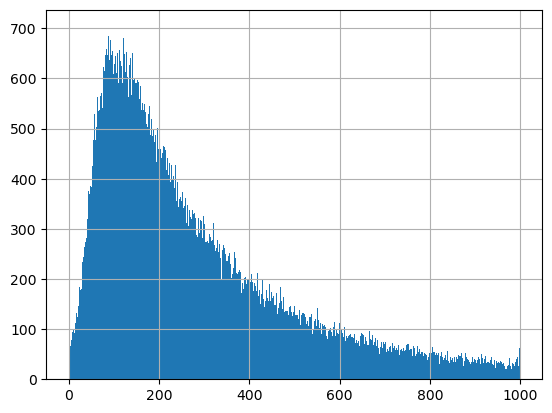

In [247]:
device_home_areas_df.groupby(['destination'])['origin'].count().hist(bins=list(range(1000)))

<Axes: >

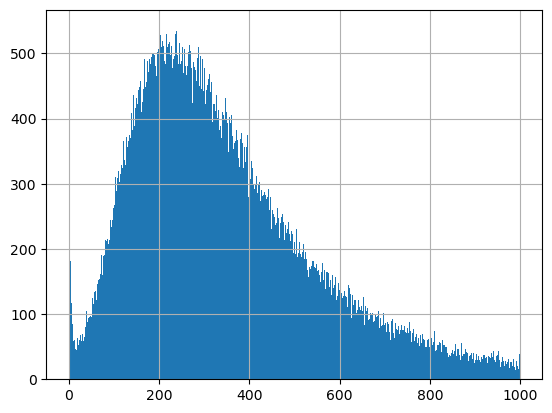

In [248]:
device_home_areas_df.groupby(['origin'])['destination'].count().hist(bins=list(range(1000)))

In [249]:
print("The inter CBG stop (outside home) flow ratio:")
device_home_areas_df.query("origin != destination")['stop'].sum() / device_home_areas_df['stop'].sum() 

The inter CBG stop (outside home) flow ratio:


np.float64(1.0)

In [250]:
# dest_dict = {o:df for o, df in tqdm(device_home_areas_df.groupby("destination"))}    # .set_index('origin') 
ori_dict = {o:df.set_index('destination') for o, df in tqdm(device_home_areas_df.groupby("origin"))}                # .set_index('destination')
# dest_dict

100%|██████████| 218445/218445 [00:52<00:00, 4124.18it/s]


In [251]:
# ori_dict
# len(dest_dict), len(ori_dict)
len(ori_dict)

218445

In [252]:
pd.options.mode.chained_assignment = None

## remove negative

In [253]:
hourly_popu_df

2022-08-01 00:00:00  2022-08-01 01:00:00  2022-08-01 02:00:00  \
CBG                                                                           
10010201001                   571                  659                  745   
10010201002                  1196                 1235                 1294   
10010202001                   840                  746                  808   
10010202002                  1105                  995                 1185   
10010203001                  2721                 2720                 2802   
...                           ...                  ...                  ...   
560459511001                 1204                 1310                 1471   
560459511002                 1758                 1936                 1934   
560459513001                 1173                 1422                 1376   
560459513002                 1297                 1326                 1216   
560459513003                 1228                 1260                 1404   

              2022-08-01 03:00:00  2022-08-01 04:00:00  2022-08-01 05:00:00  \
CBG                                                                           
10010201001                   673                  681                  742   
10010201002                  1370                 1278                 1160   
10010202001                   780                  766                  853   
10010202002                  1094                 1030                 1184   
10010203001                  2614                 2654                 2463   
...                           ...                  ...                  ...   
560459511001                 1381                 1547                 1386   
560459511002                 1856                 1763                 1926   
560459513001                 1425                 1415                 1328   
560459513002                 1368                 1464                 1306   
560459513003                 1269                 1406                 1387   

              2022-08-01 06:00:00  2022-08-01 07:00:00  2022-08-01 08:00:00  \
CBG                                                                           
10010201001                   758                  923                  520   
10010201002                   999                  589                  325   
10010202001                   674                  627                  383   
10010202002                   948                 2116                 2004   
10010203001                  2107                 1601                 1359   
...                           ...                  ...                  ...   
560459511001                 1300                 1254                 1492   
560459511002                 1766                 1450                 1649   
560459513001                 1479                 1059                 1228   
560459513002                 1609                 1828                 1764   
560459513003                 1333                 1113                 1451   

              2022-08-01 09:00:00  2022-08-01 10:00:00  2022-08-01 11:00:00  \
CBG                                                                           
10010201001                   251                  191                   69   
10010201002                   581                  574                  337   
10010202001                   381                  278                  160   
10010202002                  2107                 1825                 2025   
10010203001                  1653                 1281                 1223   
...                           ...                  ...                  ...   
560459511001                 1719                 1060                 1021   
560459511002                 1714                 1721                 1591   
560459513001                 1399                 1056                 1046   
560459513002                 2343                 1772       

In [254]:
# ! pip install numba
rows, cols = np.where(hourly_popu_df < 0)

In [255]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from numba import njit


# AI generated code below, Huan did not fully understand and check (2025-12-26)
# -------------------------------------------------------------
# NUMBA core loop (flat origin->dest mapping)
# -------------------------------------------------------------
@njit
def _redistribute_loop(
    new_hourly_popu_arr,
    ACS_arr,
    origin_rows,
    flat_dest_rows,
    flat_dest_stops,
    offsets,
    rows,
    cols,
    positive_mask_arr,
    min_ratio,
    skip_pos
):
    n_rows = new_hourly_popu_arr.shape[0]
    n_cols = new_hourly_popu_arr.shape[1]
    skip_counter = 0

    for pos in range(skip_pos, len(rows)):
        row = rows[pos]
        col = cols[pos]

        if row < 0 or row >= n_rows or col < 0 or col >= n_cols:
            continue

        hourly_popu = new_hourly_popu_arr[row, col]
        ACS_popu = ACS_arr[row]
        if ACS_popu < 0:
            continue

        min_popu = min_ratio * ACS_popu
        diff_popu = min_popu - hourly_popu
        if diff_popu < 0:
            continue

        # origin mapping
        origin_idx = origin_rows[row]
        if origin_idx == -1:
            skip_counter += 1
            continue

        start = offsets[origin_idx]
        end   = offsets[origin_idx + 1]

        # count valid destinations
        valid_count = 0
        for i in range(start, end):
            dr = flat_dest_rows[i]
            if dr >= 0 and dr < n_rows and positive_mask_arr[dr, col]:
                valid_count += 1

        if valid_count == 0:
            skip_counter += 1
            continue

        # collect valid rows & stops
        dest_rows = np.empty(valid_count, dtype=np.int64)
        dest_stops = np.empty(valid_count, dtype=np.float64)
        idx2 = 0
        for i in range(start, end):
            dr = flat_dest_rows[i]
            if dr >= 0 and dr < n_rows and positive_mask_arr[dr, col]:
                dest_rows[idx2] = dr
                dest_stops[idx2] = flat_dest_stops[i]
                idx2 += 1

        stop_sum = dest_stops.sum()
        if stop_sum <= 0:
            skip_counter += 1
            continue

        stop_weights = dest_stops / stop_sum
        adj_values = diff_popu * stop_weights

        # update destinations
        for i in range(valid_count):
            new_hourly_popu_arr[dest_rows[i], col] -= adj_values[i]

        # update origin
        new_hourly_popu_arr[row, col] = min_popu

    return skip_counter



# -------------------------------------------------------------
# High-level function
# -------------------------------------------------------------
def enforce_min_population_numba_flat(
    hourly_popu_df: pd.DataFrame,
    ACS_df: pd.DataFrame,
    ori_dict: dict,
    rows,
    cols,
    min_ratio: float = 0.1,
    skip_pos: int = 0,
):
    hourly_popu_df = hourly_popu_df.copy()
    ACS_df = ACS_df.copy()

    # ensure index alignment
    ACS_df = ACS_df.reindex(hourly_popu_df.index)

    # map to row indices
    hourly_popu_df['row'] = np.arange(len(hourly_popu_df), dtype=np.int64)
    value_cols = [c for c in hourly_popu_df.columns if c != 'row']

    hourly_arr = hourly_popu_df[value_cols].to_numpy(dtype=np.float64)
    new_hourly_popu_arr = hourly_arr.copy()
    ACS_arr = ACS_df["totalpopulation"].to_numpy(dtype=np.float64)

    # precompute positive mask
    positive_mask_arr = hourly_arr > 0

    # ---------------------------------------------------------
    # flatten origin->dest mapping for numba
    # ---------------------------------------------------------
    row_index_series = hourly_popu_df["row"]

    origin_rows = np.full(len(hourly_popu_df), -1, dtype=np.int64)
    
    all_dest_rows = []
    all_dest_stops = []
    offsets = [0]
    counter = 0

    for origin_row, origin_CBG in enumerate(hourly_popu_df.index):
        if origin_CBG not in ori_dict:
            continue

        df0 = ori_dict[origin_CBG]
        joined = df0.join(row_index_series.to_frame("row"), how="left")

        dest_rows_all = joined['row'].to_numpy()
        dest_stops_all = joined['stop'].to_numpy(dtype=np.float64)

        mask = ~np.isnan(dest_rows_all) & (dest_stops_all > 0)
        if not np.any(mask):
            continue

        origin_rows[origin_row] = counter

        v_rows = dest_rows_all[mask].astype(np.int64)
        v_stops = dest_stops_all[mask]

        all_dest_rows.append(v_rows)
        all_dest_stops.append(v_stops)

        offsets.append(offsets[-1] + len(v_rows))
        counter += 1

    flat_dest_rows = np.concatenate(all_dest_rows) if all_dest_rows else np.empty(0, dtype=np.int64)
    flat_dest_stops = np.concatenate(all_dest_stops) if all_dest_stops else np.empty(0, dtype=np.float64)
    offsets = np.array(offsets, dtype=np.int64)

    # ensure array types for numba
    rows = np.asarray(rows, dtype=np.int64)
    cols = np.asarray(cols, dtype=np.int64)

    # ---------------------------------------------------------
    # run accelerated loop
    # ---------------------------------------------------------
    print("Running numba(loop) with flattened mappings...")
    skipped = _redistribute_loop(
        new_hourly_popu_arr,
        ACS_arr,
        origin_rows,
        flat_dest_rows,
        flat_dest_stops,
        offsets,
        rows,
        cols,
        positive_mask_arr,
        min_ratio,
        skip_pos
    )

    print(f"Done. Skipped {skipped} cells without valid destinations.")

    # build output DF
    new_df = pd.DataFrame(new_hourly_popu_arr,
                          index=hourly_popu_df.index,
                          columns=value_cols)

    return new_df

new_df = enforce_min_population_numba_flat(
    hourly_popu_df, ACS_df, ori_dict,
    rows=rows, cols=cols,
    min_ratio=0.1
)

total_cell_cnt = hourly_popu_df.shape[0] * hourly_popu_df.shape[1]
rows, cols = np.where(new_df < 0)

new_df = enforce_min_population_numba_flat(
    new_df, ACS_df, ori_dict,
    rows=rows, cols=cols,
    min_ratio=0.1
)

rows, cols = np.where(new_df < 0)
# set the negative values to minimal population
for r, c in zip(rows, cols):
    CBG = new_df.index[r]
    ACS_popu = ACS_df.loc[CBG, 'totalpopulation']
    if ACS_popu < 0:
        continue
    min_popu = 0.1 * ACS_popu
    new_df.iat[r, c] = min_popu


new_df.round().astype(int).to_csv(CBG_hourly_population_fname)
new_df

Running numba(loop) with flattened mappings...
Done. Skipped 5 cells without valid destinations.
Running numba(loop) with flattened mappings...
Done. Skipped 11 cells without valid destinations.


2022-08-01 00:00:00  2022-08-01 01:00:00  2022-08-01 02:00:00  \
CBG                                                                           
10010201001                 571.0                659.0                745.0   
10010201002                1196.0               1235.0               1294.0   
10010202001                 840.0                746.0                808.0   
10010202002                1105.0                995.0               1185.0   
10010203001                2721.0               2720.0               2802.0   
...                           ...                  ...                  ...   
560459511001               1204.0               1310.0               1471.0   
560459511002               1758.0               1936.0               1934.0   
560459513001               1173.0               1422.0               1376.0   
560459513002               1297.0               1326.0               1216.0   
560459513003               1228.0               1260.0               1404.0   

              2022-08-01 03:00:00  2022-08-01 04:00:00  2022-08-01 05:00:00  \
CBG                                                                           
10010201001                 673.0                681.0                742.0   
10010201002                1370.0               1278.0               1160.0   
10010202001                 780.0                766.0                853.0   
10010202002                1094.0               1030.0               1184.0   
10010203001                2614.0               2654.0               2463.0   
...                           ...                  ...                  ...   
560459511001               1381.0               1547.0               1386.0   
560459511002               1856.0               1763.0               1926.0   
560459513001               1425.0               1415.0               1328.0   
560459513002               1368.0               1464.0               1306.0   
560459513003               1269.0               1406.0               1387.0   

              2022-08-01 06:00:00  2022-08-01 07:00:00  2022-08-01 08:00:00  \
CBG                                                                           
10010201001                 758.0                923.0                520.0   
10010201002                 999.0                589.0                325.0   
10010202001                 674.0                627.0                383.0   
10010202002                 948.0               2116.0               2004.0   
10010203001                2107.0               1601.0               1359.0   
...                           ...                  ...                  ...   
560459511001               1300.0               1254.0               1492.0   
560459511002               1766.0               1450.0               1649.0   
560459513001               1479.0               1059.0               1228.0   
560459513002               1609.0               1828.0               1764.0   
560459513003               1333.0               1113.0               1451.0   

              2022-08-01 09:00:00  2022-08-01 10:00:00  2022-08-01 11:00:00  \
CBG                                                                           
10010201001            251.000000           191.000000            68.670969   
10010201002            581.000000           574.000000           337.000000   
10010202001            381.000000           278.000000           158.631336   
10010202002           2107.000000          1825.000000          2022.602646   
10010203001           1653.000000          1281.000000          1220.333507   
...                           ...                  ...                  ...   
560459511001          1719.000000          1060.000000          1018.993583   
560459511002          1714.000000          1721.000000          1591.000000   
560459513001          1399.000000          1056.000000          1046.000000   
560459513002          2342.596987          1771.698598       

In [256]:
(new_df < 0).sum().sum()  

np.int64(0)

In [257]:
STOP

NameError: name 'STOP' is not defined

# Note used below

In [ ]:
min_ratio = 0.1 # minimum population in a CBG

# new_hourly_popu_df = hourly_popu_df.copy()

new_hourly_popu_arr = hourly_popu_df.copy().to_numpy()#.astype(float)

hourly_popu_df['row'] = hourly_popu_df.reset_index().index
hourly_popu_df['row'] = hourly_popu_df['row'].astype(np.int64)
# CBG_to_row_dict = hourly_popu_df['row'].to_dict()

hourly_arr = hourly_popu_df.to_numpy(dtype=np.float64)
ACS_arr = ACS_df['totalpopulation'].reindex(hourly_popu_df.index).to_numpy()
outbound_arr = outbound_df.to_numpy(dtype=np.float64)

processed_cnt = 0

skip_pos = 0 # 507130   # 506699 + 276

CBG0 = ""

skip_cells = []


for row, col in tqdm(zip(rows[skip_pos:], cols[skip_pos:]), total=len(rows)-skip_pos):
# for row, col in zip(rows, cols):
    processed_cnt += 1
    differece = 0
    try:
        CBG = hourly_popu_df.index[row]
        ACS_popu = ACS_arr[row]
  
        if CBG != CBG0:   # a new CBG
        
            try:
                outbound = outbound_df.loc[CBG].iloc[col]
            except Exception as e:
                # print("Error in outbound = outbound_df.loc[CBG][col]. ", e)
                # print(f"row: {row}, col: {col}   {processed_cnt} / {len(rows)}, {100 *processed_cnt / len(rows) : .2f}%")
                continue

 
            try:        
                ACS_popu = ACS_df.loc[CBG]['totalpopulation']
                monthly_out_dist_df0 =  ori_dict[CBG]#.set_index('destination') # extract the destination CBGs
                CBG0 = CBG
            except Exception as e:
                # print("Error in ACS_df.loc[CBG]['totalpopulation']. ", e)
                continue
                
                
        hourly_popu = hourly_popu_df.iloc[row, col]

        column_name = hourly_popu_df.columns[col]

        
        min_popu = min_ratio * ACS_popu
 
        
                        
        # a = (hourly_popu_df[f"hour_{col}"] > 0)            
        positive_CBGs = postives_CBG_popu_df_dict[col][['row']]
    
        monthly_out_dist_df = monthly_out_dist_df0.join(positive_CBGs, how='inner') # .dropna()  #  # 150 item /second
        
        if len(monthly_out_dist_df) == 0:
            # new_hourly_popu_arr[row, col] = min_popu  # increased by diff_p
            skip_cells.append((row, col))
            # print("Skipped row, col, skip_cells:", row, col, skip_cells)
            continue


        monthly_out_dist_df['stop_weight'] = monthly_out_dist_df['stop'] / monthly_out_dist_df['stop'].sum()  # compute the weight

        
        diff_popu = min_popu - hourly_popu

        adj_outbound =  diff_popu  # *  (outbound) / (outbound + inbound)


        monthly_out_dist_df['adj_popu'] = adj_outbound  * monthly_out_dist_df['stop_weight'].copy()
# 

        new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col] = new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col]  - monthly_out_dist_df['adj_popu'].to_numpy()   # this is correct!

   
        new_hourly_popu_arr[row, col] = min_popu  # increased by diff_p

        differece = new_hourly_popu_arr[:, col].sum() - hourly_popu_df.iloc[:, col].sum()  # Should be the last line
        

        def _print_info():
            try:
                print(f"row: {row}, col: {col}   {processed_cnt} / {len(rows)}, {100 *processed_cnt / len(rows) : .2f}%")
                print("min_popu:", min_popu)
                print("diff_popu, adj_popu:", diff_popu, monthly_out_dist_df['adj_popu'].sum())
                print("Before and after population at CBG:", hourly_popu,  new_hourly_popu_arr[row, col], hourly_popu_df.index[row])
                print(f"Before: {hourly_popu_df.iloc[:, col].sum()},  after: {new_hourly_popu_arr[:, col].sum()}, differece: {differece}")
                # print()
                print(f"ori_dict[CBG] len: {ori_dict[CBG].shape}, monthly_out_dist_df len: {monthly_out_dist_df.shape}, new_hourly_popu_arr[] len:{new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col].shape}, hourly_popu_df[] len: {hourly_popu_df.iloc[monthly_out_dist_df['row']].shape}",)
                print()
            except Exception as e:
                print("Error in _print_infor()", e)

        if processed_cnt % 10000000 == 0:
            _print_info()

        # if processed_cnt == 9:
        if abs(diff_popu) > 5000:
            print("Large difference!")
            _print_info()
            # break
             
    except Exception as e:
        print("Error for loop:", e)
        print(f"row: {row}, col: {col}   {processed_cnt} / {len(rows)}, {100 *processed_cnt / len(rows) : .2f}%")
        _print_info()
        continue

# Note to rebuild by column:
# 1. set the negetive cell to 10% ACS population.
# 2. Set other 90% population to the destination CBGs according to the monthly distribution.


In [ ]:
(hourly_popu_df.iloc[:, :] < 0).sum().sum()

np.int64(3566590)

In [ ]:
(new_hourly_popu_arr[:, ]<0).sum() 
# new_hourly_popu_arr

np.int64(433361)

In [ ]:
new_hourly_popu_df = hourly_popu_df.iloc[:, :-1]
new_hourly_popu_df.iloc[:, :] = new_hourly_popu_arr[:, :-1]
new_hourly_popu_df 

2022-01-01 00:00:00  2022-01-01 01:00:00  2022-01-01 02:00:00  \
CBG                                                                           
10010201001                   832                  437                  517   
10010201002                  2197                 1840                 2120   
10010202001                   983                  615                  684   
10010202002                  1417                 1115                 1123   
10010203001                  2927                 2979                 3243   
...                           ...                  ...                  ...   
560459511001                  858                 1346                 1915   
560459511002                 1417                 1681                 1498   
560459513001                 1162                 1076                 1181   
560459513002                 1230                 1079                 1039   
560459513003                 1318                 1792                 1646   

              2022-01-01 03:00:00  2022-01-01 04:00:00  2022-01-01 05:00:00  \
CBG                                                                           
10010201001                   592                  648                  675   
10010201002                  2063                 2205                 2199   
10010202001                   750                  768                  822   
10010202002                  1003                  981                 1139   
10010203001                  3676                 3151                 2916   
...                           ...                  ...                  ...   
560459511001                 1793                 1699                 1682   
560459511002                 1495                 1569                 1635   
560459513001                 1218                 1229                 1453   
560459513002                  994                 1050                 1138   
560459513003                 1247                 1319                 1291   

              2022-01-01 06:00:00  2022-01-01 07:00:00  2022-01-01 08:00:00  \
CBG                                                                           
10010201001                   641                  677                  590   
10010201002                  1742                 1544                 1189   
10010202001                   758                  767                  748   
10010202002                  1041                 1196                 1403   
10010203001                  2870                 2811                 2691   
...                           ...                  ...                  ...   
560459511001                 1675                 1759                 1913   
560459511002                 1751                 1755                 2055   
560459513001                 1196                 1353                 1089   
560459513002                 1195                 1292                 1719   
560459513003                 1162                 1193                 1305   

              2022-01-01 09:00:00  2022-01-01 10:00:00  2022-01-01 11:00:00  \
CBG                                                                           
10010201001                   582                  537                  386   
10010201002                  1049                 1046                 1041   
10010202001                   601                  666                  565   
10010202002                  1121                 1258                 1190   
10010203001                  2629                 2766                 2878   
...                           ...                  ...                  ...   
560459511001                 2370                 2143                 1517   
560459511002                 2442                 1857                 1046   
560459513001                 1147                 1220                  895   
560459513002                 1316                 2088       

In [ ]:
(new_hourly_popu_arr < 0).sum().sum() /( new_hourly_popu_arr.shape[0] *  new_hourly_popu_arr.shape[1])

np.float64(0.0026840125386995706)

In [ ]:
new_hourly_popu_df.astype(np.int64).to_csv(os.path.join(save_dir, f'CBG_population_hourly_{year}{month:02}.csv'))

<Axes: >

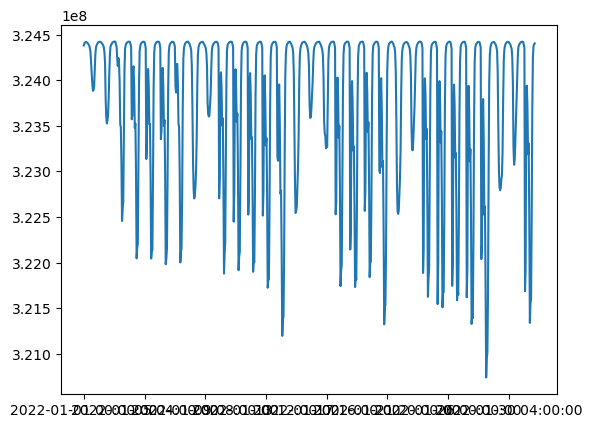

In [ ]:
new_hourly_popu_df.astype(np.int64).sum().plot()

In [ ]:
STOP

NameError: name 'STOP' is not defined

## Show the results

In [ ]:
hourly_population_map_df = new_hourly_popu_df
hourly_population_map_df

hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
CBG                                                                    
10010201001    529.0   642.0   660.0   647.0   671.0   731.0   855.0   
10010201002   1513.0  1500.0  1548.0  1528.0  1238.0   997.0   385.0   
10010202001    612.0   712.0   703.0   733.0   755.0   757.0   858.0   
10010202002    870.0   839.0   975.0  1018.0  1070.0  1173.0  1149.0   
10010203001   2406.0  2397.0  2543.0  2429.0  2367.0  2014.0  1404.0   
...              ...     ...     ...     ...     ...     ...     ...   
721537506011  1108.0  1073.0  1100.0  1022.0   926.0   880.0   646.0   
721537506012  3260.0  3034.0  2754.0  2610.0  2597.0  2507.0  2220.0   
721537506013  1148.0  1214.0  1074.0  1028.0  1026.0  1013.0  1069.0   
721537506021  1831.0  1958.0  2060.0  1995.0  1989.0  1795.0  1812.0   
721537506022   745.0   777.0   793.0   741.0   679.0   711.0   686.0   

                   hour_8       hour_9      hour_10      hour_11      hour_12  \
CBG                                                                             
10010201001   1864.263248   -80.405225   321.205102    43.916865   326.416571   
10010201002    126.300000   126.300000    33.744427   462.387207   208.542972   
10010202001   4644.541384   390.165527   522.534419   263.095192   104.124544   
10010202002   7338.223918  3592.092241  2601.824269  2221.729582  2984.599936   
10010203001    974.110196  1573.499037  3357.232380  1022.476747    42.267111   
...                   ...          ...          ...          ...          ...   
721537506011   217.586790   162.050862   663.540195   707.696334   663.543292   
721537506012  1345.906480  1396.987550  1951.352148  2041.874685  2373.427062   
721537506013  1007.390615   934.358101   899.398690  1016.625865  1049.473552   
721537506021  1450.692336  1473.959047  1851.710960  2044.779628  1929.121794   
721537506022   530.326547   549.402630   769.496897   739.414508   888.507237   

                  hour_13      hour_14      hour_15      hour_16      hour_17  \
CBG                                                                             
10010201001     24.439370   708.218682   -17.946427  1175.210775   227.526258   
10010201002    126.300000   126.300000   126.300000   126.300000   -77.133282   
10010202001    154.374431    83.500000   157.398432  3247.240606   513.193148   
10010202002   3156.695514  2733.634029  2454.850919  4896.750829  1470.765642   
10010203001    277.400000  -106.502487   277.400000  1271.456321  1783.807972   
...                   ...          ...          ...          ...          ...   
721537506011   317.108634   319.674029   483.303779   346.908070   281.044680   
721537506012  2883.115972  2954.535635  2831.906970  2632.195165  3058.685961   
721537506013  1070.415626  1160.837746  1123.349941  1008.930765  1195.186314   
721537506021  1841.742283  2071.801662  1881.314592  1700.371886  1530.520635   
721537506022   774.871142   997.052376   996.393287   870.291133   799.950782   

                  hour_18      hour_19      hour_20      hour_21      hour_22  \
CBG                                                                             
10010201001     -2.535503   -32.424028   -25.788032   458.790920   231.711837   
10010201002   1285.225342  2482.550369  3137.217142  3416.768548  2676.721241   
10010202001     83.500000    83.500000    83.500000   186.139989   170.647167   
10010202002   3214.249993  1556.897654   963.131093   816.326881   544.699791   
10010203001   3437.128452  4264.138282  6519.131799  6750.995415  5288.898764   
...                   ...          ...          ...          ...          ...   
721537506011    76.297668   226.252271   798.519249  1071.553827  1048.332186   
721537506012  3353.812539  4248.382822  4887.718143  5378.724542  4961.109276   
721537506013  1460.921909  1355.848247  1217.019766  1353.938931  1272.893417   
721537506021  1597.861356  1748.957718  1987.462012  2042.934583  2288.329451 

In [ ]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})
ACS_df['county_FIPS'] = ACS_df['county_FIPS'].astype(str).str.zfill(5)
ACS_df

YEAR  MON REGION ISO_COUNTRY_CODE  CENSUS_BLOCK_GROUP  \
0       2022   11     AL               US         10010201001   
1       2022   11     AL               US         10010201002   
2       2022   11     AL               US         10010202001   
3       2022   11     AL               US         10010202002   
4       2022   11     AL               US         10010203001   
...      ...  ...    ...              ...                 ...   
219677  2022   11     PR               US        721537506011   
219678  2022   11     PR               US        721537506012   
219679  2022   11     PR               US        721537506013   
219680  2022   11     PR               US        721537506021   
219681  2022   11     PR               US        721537506022   

        NUMBER_DEVICES_RESIDING  NUMBER_DEVICES_PRIMARY_DAYTIME      CBG_FIPS  \
0                            67                            25.0  010010201001   
1                           184                            91.0  010010201002   
2                           102                            55.0  010010202001   
3                           144                            69.0  010010202002   
4                           318                           141.0  010010203001   
...                         ...                             ...           ...   
219677                        6                             3.0  721537506011   
219678                       31                            24.0  721537506012   
219679                       21                             8.0  721537506013   
219680                       13                             8.0  721537506021   
219681                       10                             7.0  721537506022   

        totalpopulation  sampling_rate  person_per_device county_FIPS  \
0                   730       0.018356          54.477612       01001   
1                  1263       0.029137          34.320652       01001   
2                   835       0.024431          40.931373       01001   
3                  1124       0.025623          39.027778       01001   
4                  2774       0.022927          43.616352       01001   
...                 ...            ...                ...         ...   
219677              883       0.001359         735.833333       72153   
219678             2523       0.002457         406.935484       72153   
219679              991       0.004238         235.952381       72153   
219680             1577       0.001649         606.538462       72153   
219681              648       0.003086         324.000000       72153   

        county_device  county_device_daytime  county_device_population  \
0                7406                   7406                     55380   
1                7406                   7406                     55380   
2                7406                   7406                     55380   
3                7406                   7406                     55380   
4                7406                   7406                     55380   
...               ...                    ...                       ...   
219677            627                    627                     35428   
219678            627                    627                     35428   
219679            627                    627                     35428   
219680            627                    627                     35428   
219681            627                    627                     35428   

        person_per_device_county  
0                       7.477721  
1                       7.477721  
2                       7.477721  
3                       7.477721  
4                       7.477721  
...                          ...  
219677                 56.503987  
219678                 56.503987  
219679                 56.503987  
219680                 56.503987  
219681                 56.503987  

[219682 rows x 16 columns]

In [ ]:
def get_county_FIPS_dict():
    county_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_county_20m.zip')
    state_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip')
    county_gdf = county_gdf.merge(state_gdf[['STATEFP', 'STUSPS', 'NAME']], left_on='STATEFP', right_on='STATEFP', suffixes=['_county', '_state'])
    county_gdf['county_state'] = county_gdf['NAME_county'] + ', ' + county_gdf['STUSPS']
    county_gdf['GEOID'] = county_gdf['GEOID'].astype(str).str.zfill(5)
    county_FIPS_dict = county_gdf.set_index(['county_state'])['GEOID'].to_dict()
    return county_FIPS_dict

county_FIPS_dict = get_county_FIPS_dict()

In [ ]:
CBG2019_gdf = gpd.read_file(CBG_2019_fname)
CBG2019_gdf['county_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 


In [ ]:
CBG2019_gdf

GEOID                                           geometry  \
0       010730059033  POLYGON ((-86.69206 33.60022, -86.69174 33.600...   
1       010730059031  POLYGON ((-86.68307 33.59456, -86.68297 33.594...   
2       010730059053  POLYGON ((-86.70049 33.61777, -86.70047 33.617...   
3       010730059051  POLYGON ((-86.71185 33.59383, -86.71176 33.593...   
4       010730057023  POLYGON ((-86.88311 33.47224, -86.88307 33.472...   
...              ...                                                ...   
220328  720210302002  POLYGON ((-66.14085 18.38643, -66.14022 18.389...   
220329  720210314012  POLYGON ((-66.16869 18.38156, -66.16750 18.382...   
220330  720210312021  POLYGON ((-66.18304 18.38045, -66.18263 18.380...   
220331  720531504003  POLYGON ((-65.64082 18.34100, -65.64019 18.341...   
220332  720531501044  POLYGON ((-65.63509 18.36540, -65.63474 18.365...   

       county_FIPS           CBG  
0            01073  010730059033  
1            01073  010730059031  
2            01073  010730059053  
3            01073  010730059051  
4            01073  010730057023  
...            ...           ...  
220328       72021  720210302002  
220329       72021  720210314012  
220330       72021  720210312021  
220331       72053  720531504003  
220332       72053  720531501044  

[220333 rows x 4 columns]

In [ ]:
hour_cnt = hourly_population_map_df.shape[1]
hourly_population_map_df.iloc[:, :hour_cnt ]

hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
CBG                                                                    
10010201001    529.0   642.0   660.0   647.0   671.0   731.0   855.0   
10010201002   1513.0  1500.0  1548.0  1528.0  1238.0   997.0   385.0   
10010202001    612.0   712.0   703.0   733.0   755.0   757.0   858.0   
10010202002    870.0   839.0   975.0  1018.0  1070.0  1173.0  1149.0   
10010203001   2406.0  2397.0  2543.0  2429.0  2367.0  2014.0  1404.0   
...              ...     ...     ...     ...     ...     ...     ...   
721537506011  1108.0  1073.0  1100.0  1022.0   926.0   880.0   646.0   
721537506012  3260.0  3034.0  2754.0  2610.0  2597.0  2507.0  2220.0   
721537506013  1148.0  1214.0  1074.0  1028.0  1026.0  1013.0  1069.0   
721537506021  1831.0  1958.0  2060.0  1995.0  1989.0  1795.0  1812.0   
721537506022   745.0   777.0   793.0   741.0   679.0   711.0   686.0   

                   hour_8       hour_9      hour_10      hour_11      hour_12  \
CBG                                                                             
10010201001   1864.263248   -80.405225   321.205102    43.916865   326.416571   
10010201002    126.300000   126.300000    33.744427   462.387207   208.542972   
10010202001   4644.541384   390.165527   522.534419   263.095192   104.124544   
10010202002   7338.223918  3592.092241  2601.824269  2221.729582  2984.599936   
10010203001    974.110196  1573.499037  3357.232380  1022.476747    42.267111   
...                   ...          ...          ...          ...          ...   
721537506011   217.586790   162.050862   663.540195   707.696334   663.543292   
721537506012  1345.906480  1396.987550  1951.352148  2041.874685  2373.427062   
721537506013  1007.390615   934.358101   899.398690  1016.625865  1049.473552   
721537506021  1450.692336  1473.959047  1851.710960  2044.779628  1929.121794   
721537506022   530.326547   549.402630   769.496897   739.414508   888.507237   

                  hour_13      hour_14      hour_15      hour_16      hour_17  \
CBG                                                                             
10010201001     24.439370   708.218682   -17.946427  1175.210775   227.526258   
10010201002    126.300000   126.300000   126.300000   126.300000   -77.133282   
10010202001    154.374431    83.500000   157.398432  3247.240606   513.193148   
10010202002   3156.695514  2733.634029  2454.850919  4896.750829  1470.765642   
10010203001    277.400000  -106.502487   277.400000  1271.456321  1783.807972   
...                   ...          ...          ...          ...          ...   
721537506011   317.108634   319.674029   483.303779   346.908070   281.044680   
721537506012  2883.115972  2954.535635  2831.906970  2632.195165  3058.685961   
721537506013  1070.415626  1160.837746  1123.349941  1008.930765  1195.186314   
721537506021  1841.742283  2071.801662  1881.314592  1700.371886  1530.520635   
721537506022   774.871142   997.052376   996.393287   870.291133   799.950782   

                  hour_18      hour_19      hour_20      hour_21      hour_22  \
CBG                                                                             
10010201001     -2.535503   -32.424028   -25.788032   458.790920   231.711837   
10010201002   1285.225342  2482.550369  3137.217142  3416.768548  2676.721241   
10010202001     83.500000    83.500000    83.500000   186.139989   170.647167   
10010202002   3214.249993  1556.897654   963.131093   816.326881   544.699791   
10010203001   3437.128452  4264.138282  6519.131799  6750.995415  5288.898764   
...                   ...          ...          ...          ...          ...   
721537506011    76.297668   226.252271   798.519249  1071.553827  1048.332186   
721537506012  3353.812539  4248.382822  4887.718143  5378.724542  4961.109276   
721537506013  1460.921909  1355.848247  1217.019766  1353.938931  1272.893417   
721537506021  1597.861356  1748.957718  1987.462012  2042.934583  2288.329451 

In [ ]:
hourly_population_map_df.index = hourly_population_map_df.index.astype(str).str.zfill(12)
hourly_population_map_df

hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  \
CBG                                                                    
010010201001   529.0   642.0   660.0   647.0   671.0   731.0   855.0   
010010201002  1513.0  1500.0  1548.0  1528.0  1238.0   997.0   385.0   
010010202001   612.0   712.0   703.0   733.0   755.0   757.0   858.0   
010010202002   870.0   839.0   975.0  1018.0  1070.0  1173.0  1149.0   
010010203001  2406.0  2397.0  2543.0  2429.0  2367.0  2014.0  1404.0   
...              ...     ...     ...     ...     ...     ...     ...   
721537506011  1108.0  1073.0  1100.0  1022.0   926.0   880.0   646.0   
721537506012  3260.0  3034.0  2754.0  2610.0  2597.0  2507.0  2220.0   
721537506013  1148.0  1214.0  1074.0  1028.0  1026.0  1013.0  1069.0   
721537506021  1831.0  1958.0  2060.0  1995.0  1989.0  1795.0  1812.0   
721537506022   745.0   777.0   793.0   741.0   679.0   711.0   686.0   

                   hour_8       hour_9      hour_10      hour_11      hour_12  \
CBG                                                                             
010010201001  1864.263248   -80.405225   321.205102    43.916865   326.416571   
010010201002   126.300000   126.300000    33.744427   462.387207   208.542972   
010010202001  4644.541384   390.165527   522.534419   263.095192   104.124544   
010010202002  7338.223918  3592.092241  2601.824269  2221.729582  2984.599936   
010010203001   974.110196  1573.499037  3357.232380  1022.476747    42.267111   
...                   ...          ...          ...          ...          ...   
721537506011   217.586790   162.050862   663.540195   707.696334   663.543292   
721537506012  1345.906480  1396.987550  1951.352148  2041.874685  2373.427062   
721537506013  1007.390615   934.358101   899.398690  1016.625865  1049.473552   
721537506021  1450.692336  1473.959047  1851.710960  2044.779628  1929.121794   
721537506022   530.326547   549.402630   769.496897   739.414508   888.507237   

                  hour_13      hour_14      hour_15      hour_16      hour_17  \
CBG                                                                             
010010201001    24.439370   708.218682   -17.946427  1175.210775   227.526258   
010010201002   126.300000   126.300000   126.300000   126.300000   -77.133282   
010010202001   154.374431    83.500000   157.398432  3247.240606   513.193148   
010010202002  3156.695514  2733.634029  2454.850919  4896.750829  1470.765642   
010010203001   277.400000  -106.502487   277.400000  1271.456321  1783.807972   
...                   ...          ...          ...          ...          ...   
721537506011   317.108634   319.674029   483.303779   346.908070   281.044680   
721537506012  2883.115972  2954.535635  2831.906970  2632.195165  3058.685961   
721537506013  1070.415626  1160.837746  1123.349941  1008.930765  1195.186314   
721537506021  1841.742283  2071.801662  1881.314592  1700.371886  1530.520635   
721537506022   774.871142   997.052376   996.393287   870.291133   799.950782   

                  hour_18      hour_19      hour_20      hour_21      hour_22  \
CBG                                                                             
010010201001    -2.535503   -32.424028   -25.788032   458.790920   231.711837   
010010201002  1285.225342  2482.550369  3137.217142  3416.768548  2676.721241   
010010202001    83.500000    83.500000    83.500000   186.139989   170.647167   
010010202002  3214.249993  1556.897654   963.131093   816.326881   544.699791   
010010203001  3437.128452  4264.138282  6519.131799  6750.995415  5288.898764   
...                   ...          ...          ...          ...          ...   
721537506011    76.297668   226.252271   798.519249  1071.553827  1048.332186   
721537506012  3353.812539  4248.382822  4887.718143  5378.724542  4961.109276   
721537506013  1460.921909  1355.848247  1217.019766  1353.938931  1272.893417   
721537506021  1597.861356  1748.957718  1987.462012  2042.934583  2288.329451 

  0%|                                                                                         | 0/3214 [00:00<?, ?it/s]

Worth, MO
vmax:  9376.940129854807
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\New York_NY_hourly_population_20221101_v4.png
vmax:  9376.940129854807
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\New York_NY_hourly_population_20221102_v4.png
vmax:  9376.940129854807
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\New York_NY_hourly_population_20221103_v4.png
vmax:  9376.940129854807
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\New York_NY_hourly_population_20221104_v4.png
vmax:  9376.940129854807
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire

  0%|                                                                                         | 0/3214 [08:36<?, ?it/s]


KeyError: 'hour_721'

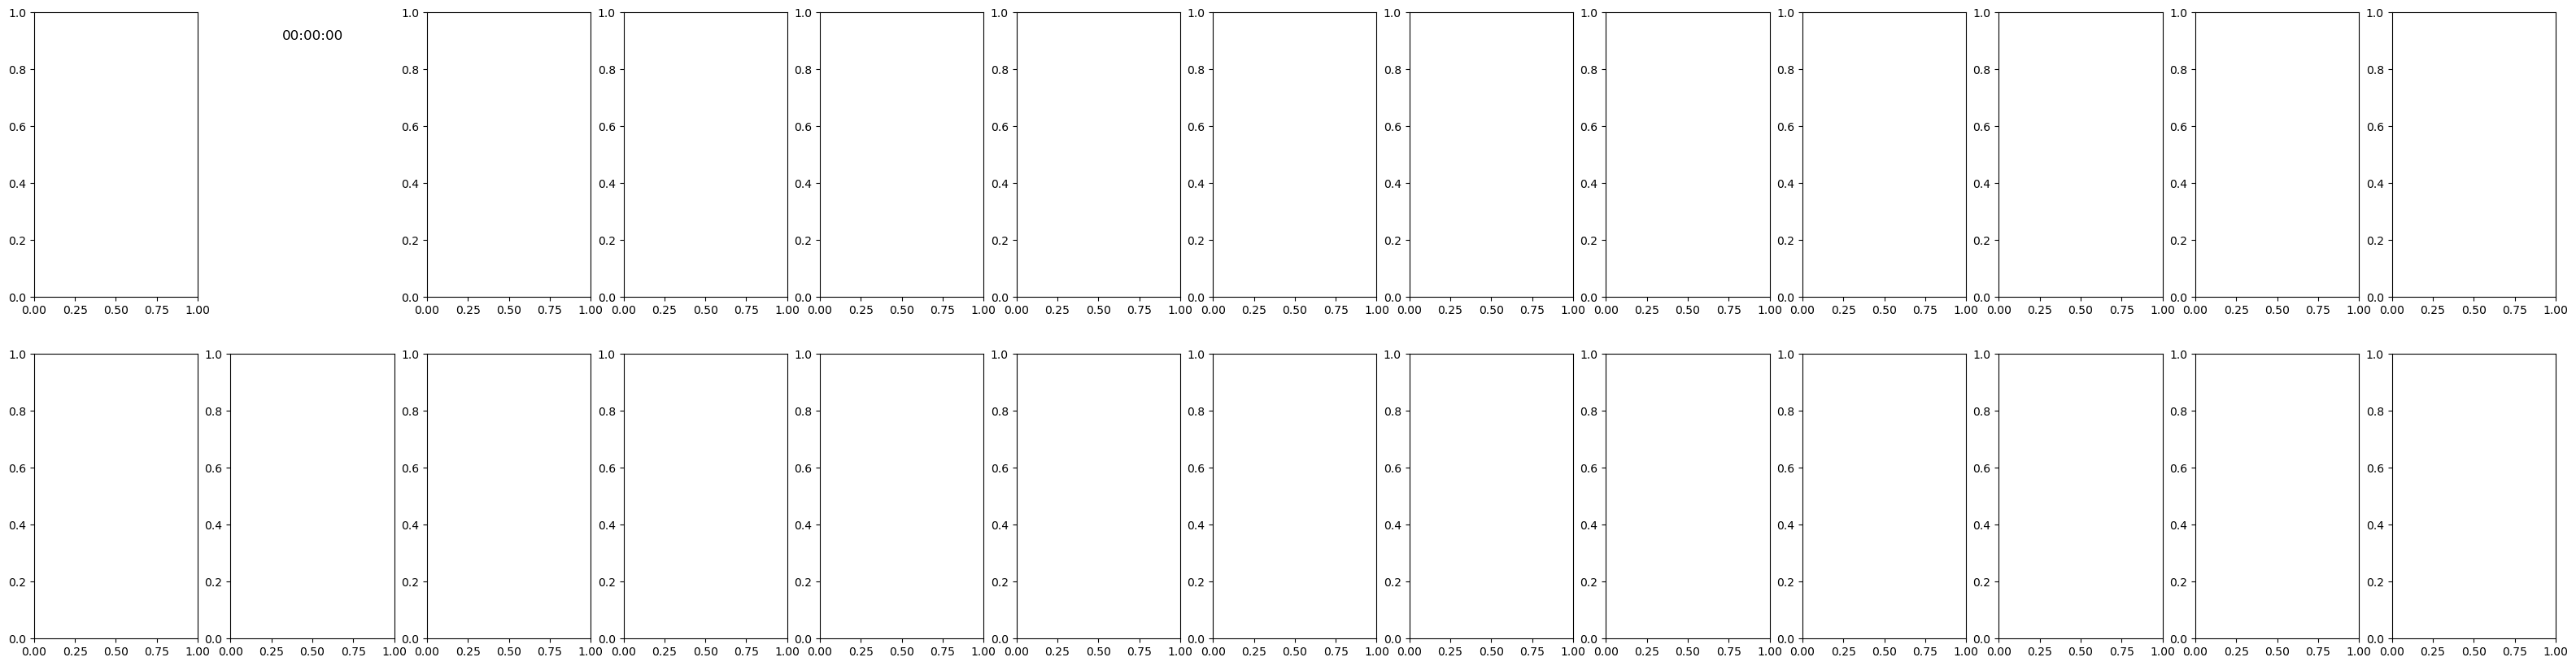

In [ ]:
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cmap = 'viridis'
# day = 18

target_county = 'New York, NY'
target_county = 'Centre, PA'
target_county = 'Richland, SC'
target_county = 'Lexington, SC'
target_county = 'Union, NJ'
target_county = 'Fairfax, VA'
target_county = 'Los Angeles, CA'
target_county = 'Cook, IL'
target_county = 'Harris, TX'
target_county = 'Maricopa, AZ'
target_county = 'San Diego, CA'
target_county = 'Orange, CA'
target_county = 'Miami-Dade, FL'
target_county = 'Dallas, TX'
target_county = 'King, WA'
target_county = 'Riverside, CA'
target_county = 'Hudson, NJ'
target_county = 'Essex, NJ'
target_county = 'Berkshire, MA'


def draw_county_map(target_county):
    target_county = 'New York, NY'
    county_FIPS = county_FIPS_dict[target_county]
    
    target_counties = [county_FIPS] # ['36061']   # 06039
    hourly_population_map_df['county_FIPS'] = hourly_population_map_df.reset_index()['CBG'].astype(str).str[:5].to_list()
    target_hourly_pop_df = hourly_population_map_df[hourly_population_map_df['county_FIPS'].isin(target_counties)]
    
    target_pop_df = ACS_df[ACS_df['county_FIPS'].isin(target_counties)]
    
    
    target_blockgroup_gdf = CBG2019_gdf[CBG2019_gdf['county_FIPS'].isin(target_counties)]
    target_blockgroup_gdf
    
    row_cnt = 2
    col_cnt = 13
    # vmax = max(target_hourly_pop_df.iloc[:, :hour_cnt].max(axis=1).max(), target_pop_df['totalpopulation'].max())
    # vmax = target_hourly_pop_df.iloc[:, :hour_cnt ].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).std() * 3
    # print("target_hourly_pop_df:\n", target_hourly_pop_df.iloc[:, 1: hour_cnt + 1].mean(axis=1).mean())
    # print(target_hourly_pop_df)
    
    vmax = target_hourly_pop_df.iloc[:, : hour_cnt].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt ].mean(axis=1).std() * 3
    
    print("vmax: ", vmax)
    fig, axs = plt.subplots(figsize=(40, 10), nrows=row_cnt, ncols=col_cnt)
    
    # draw hourly map
    used_ax_cnt = 0
    hour_24_pop = []
    for row in range(row_cnt):
        for col in range(1, col_cnt, 1):
            # if used_ax_cnt == 24:
            #     continue
            merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df, left_on='CBG', right_on='CBG')
            hour = used_ax_cnt
            ax=axs[row, col]
            ax.axis('off')
            ax.set_title(f"{hour:02}:00:00")
            hour_column = f'hour_{hour + 1 + 24*(day - 1)}'
            merged_gdf.plot(column=hour_column, ax=ax, vmax=vmax, cmap=cmap)  # , vmax=vmax ,  legend=True
            # merged_gdf.plot(column=hour_column, ax=ax, cmap=cmap)
            hour_24_pop.append(target_hourly_pop_df[hour_column].sum())
            used_ax_cnt += 1
    
    ax=axs[0, 0]
    ax.axis('off')
    ax.set_title(f"ACS 2019 Population")
    merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG_FIPS')
    # merged_gdf.plot(column='totalpopulation', ax=ax,  cmap=cmap) # , vmax=vmax ,  legend=True
    merged_gdf.plot(column='totalpopulation', ax=ax, vmax=vmax, cmap=cmap)
    
    # draw county-level population
    ax=axs[1, 0]
    # ax.axis('off')
    ax.set_title('County hourly population')
    ax.set_ylabel('Population')
    ax.set_xlabel('Hour')
    ax.plot(hour_24_pop, label='hourly population')
    ax.axhline(merged_gdf['totalpopulation'].sum(), color='red', label='ACS population')
    ax.legend()
    
     
    fig.suptitle(f"Hourly population of county {target_county}: {year}-{month:02}-{day:02}", fontsize=24, y=1)
    
    
    # Add colorbar axes at the bottom and align it with the left and right of the subplots
    pos1 = axs[0, 0].get_position() # get the original position for first axis
    pos2 = axs[-1, -1].get_position()
    cax = fig.add_axes([pos1.x0 * 1.01, 0, (pos2.x1 - pos1.x0) * 0.99, 0.008])    # [left, bottom, width, height]  # bottom
    value_max =vmax
    value_min = 0
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
    sm._A = []
    # plt.colorbar(sm, cax=cax, label="Bias")
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
    
    for t in cbar.ax.get_xticklabels():
        t.set_fontsize(16)
    
    cbar.set_label('Population', labelpad=-80,   rotation=0, fontsize=24, loc='center')
    
    png_name = os.path.join(save_dir, f"{target_county.replace(', ', '_')}_hourly_population_{year}{month:02}{day:02}_v4.png")
    
    print("PNG name:", png_name)
    
    plt.savefig(png_name, dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.close()

for target_county, FIPS in tqdm(county_FIPS_dict.items()):
    print(target_county)
    for day in range(1, 32):
        draw_county_map(target_county)
    break

print("Done")

In [ ]:
STOP

In [ ]:
len(np.unique(rows)), len(np.unique(cols))

In [ ]:
(hourly_popu_df[column_name] < 0).sum()

In [ ]:
(hourly_popu_df.iloc[:, 16] < 136).sum()

In [ ]:
import matplotlib.pyplot as plt
plt.plot((hourly_popu_df < 0).sum())

In [ ]:
column_name

688 / 24

In [ ]:
monthly_out_dist_df
hourly_popu_df

In [ ]:
hourly_popu_df.iloc[:, col]

In [ ]:
new_hourly_popu_arr[:, col]

In [ ]:
monthly_out_dist_df['adj_popu'].sum()
hourly_popu_df.iloc[monthly_out_dist_df['row'], col]

In [ ]:
new_hourly_popu_arr[monthly_out_dist_df['row'], col] - hourly_popu_df.iloc[monthly_out_dist_df['row'], col]

In [ ]:
# monthly_out_dist_df['adj_popu'].sum()
monthly_out_dist_df
monthly_out_dist_df.merge(hourly_popu_df[['row']].reset_index(), left_on="destination", right_on="CBG")

In [ ]:
monthly_out_dist_df
hourly_popu_df['row'] = hourly_popu_df.reset_index().index
hourly_popu_df#.reset_index().set_index("CBG")

In [ ]:
hourly_popu_df['row'] = hourly_popu_df.reset_index().index
CBG_to_row_dict = hourly_popu_df['row'].to_dict()

In [ ]:
monthly_out_dist_df
new_hourly_popu_df.iloc[row, col]

In [ ]:
monthly_out_dist_df['adj_popu'].sum()
monthly_out_dist_df

In [ ]:
hourly_popu_df

In [ ]:
monthly_out_dist_df['adj_popu'].sum(), monthly_in_dist_df['adj_popu'].sum()
monthly_out_dist_df.index

(hourly_popu_df.loc[monthly_out_dist_df.index, column_name] + monthly_out_dist_df['adj_popu']).sum()  hourly_popu_df.loc[monthly_out_dist_df.index, column_name].sum()

In [ ]:
hourly_popu_df.loc[monthly_out_dist_df.index, column_name].sum(), new_hourly_popu_df.loc[monthly_out_dist_df.index, column_name].sum(), new_hourly_popu_df.loc[monthly_out_dist_df.index, column_name].sum() -  monthly_out_dist_df['adj_popu'].sum(), 

In [ ]:
monthly_in_dist_df['adj_popu'].sum()
hourly_popu_df.loc[monthly_out_dist_df.index, column_name] 

In [ ]:
hourly_popu_df.iloc[:, 8].sum()

In [ ]:
inbound_df.loc[monthly_in_dist_df.index, column_name]

hourly_popu_df

In [ ]:
monthly_out_dist_df

In [ ]:
monthly_in_dist_df
# inbound_df.loc[monthly_in_dist_df.index, column_name] + monthly_in_dist_df['adj_popu']
# monthly_in_dist_df['stop_weight'].sum()

In [ ]:
inbound_df.loc[monthly_in_dist_df['origin'], column_name] += monthly_in_dist_df['adj_popu']
inbound_df

In [ ]:
outbound.loc[monthly_out_dist_df['origin'], column_name] -= monthly_in_dist_df['adj_popu']


In [ ]:
monthly_in_dist_df['adj_popu'] = target_inbound  * monthly_in_dist_df['stop_weight'] 
print("sum of adj_popu:", monthly_in_dist_df['adj_popu'].sum())
print("target_inbound:", target_inbound)

monthly_in_dist_df

In [ ]:
column_name = hourly_popu_df.columns[col]
print("column_name:", column_name)
inbound_df.loc[monthly_in_dist_df['origin'], column_name] += monthly_in_dist_df.rename(columns={'origin': "CBG"}).set_index('CBG')['adj_popu']
inbound_df#.loc[monthly_in_dist_df['origin'], column_name]

In [ ]:
inbound_df.loc['010010205002'][8]
monthly_in_dist_df['adj_popu']
inbound_df.loc[monthly_in_dist_df['origin'], column_name]  
monthly_in_dist_df.rename(columns={'origin': "CBG"}).set_index('CBG')['adj_popu']
inbound_df.loc[monthly_in_dist_df['origin'], column_name]  + monthly_in_dist_df.rename(columns={'origin': "CBG"}).set_index('CBG')['adj_popu']

In [ ]:
inbound_df.loc[monthly_in_dist_df['origin'], column_name] = inbound_df.loc[monthly_in_dist_df['origin'], column_name]  - 1

In [ ]:
monthly_in_dist_df
# monthly_in_dist_df['stop'].sum()

In [ ]:
device_home_areas_df

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

employment_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\employment_ACS2019.csv"

employment_df = pd.read_csv(employment_fname)

employment_df

In [ ]:
employment_df['employ_rate'] = employment_df['Population 16 Years and Over: in Labor Force: Civilian: Employed'] / employment_df['Population 16 Years and Over: in Labor Force']
employment_df['employ_rate'].describe()

In [ ]:
for c in employment_df.columns:
    print(c)

# Sum the dictionary columns

In [ ]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
import calendar

tqdm.pandas()

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

import logging
# Create a logger
logger_name = 'all_logger'
logger = logging.getLogger(logger_name)

In [ ]:
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo

#  #### Dell desktop
save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor'   
data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'    # Dell
ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
##  home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
home_panel_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz"  ## large change!!!
CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"

# home_panel_fname = r"E:\OneDrive_PSU\OneDrive - The`1

# data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Dell 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Dell
# ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Lenovo
# ACS_file = r"F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv"
# CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"

# # 2018 desktop
# save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor'   
# # save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel'  # 2018 desktop
# # # data_dir = r'D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'  
# data_dir = r'\\HWW\SafeGraph\Advan_2023_API\Neighborhood_Patterns'    # 2018
# # data_dir = r'D:\SafeGraph\Advan_2024_API\Neighborhood_Patterns'    
# ACS_file = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# # home_panel_fname = f"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# home_panel_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz"  ## large change!!!
# # # https://community.deweydata.io/t/residing-device-count-in-2023-07-and-2023-08-surged-abnomorally/26675/15
# CBG_2019_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"


save_file = False

year = '2022'
month = 9

stops_per_device = 2 # stops per device per day

_, num_days = calendar.monthrange(int(year), month)
print(f"Days in {year}-{month:02d}:", num_days)


os.makedirs(save_dir, exist_ok=True)


month_dir = os.path.join(data_dir, str(year), f'{month:02}', '01')
no_dict_colum_fname = os.path.join(save_dir, f"NP_dict_column_{year}_{month:02}.csv")
device_home_areas_fname = os.path.join(save_dir, f"NP_split_device_home_areas_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_CBG_fname     = os.path.join(save_dir, f"adjusted_dwelling_time_stop_CBG_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_natinol_fname = os.path.join(save_dir, f"adjusted_dwelling_time_stop_natinol_{year}_{month:02}.csv")
person_per_device_fname = os.path.join(save_dir, f"person_per_device_{year}_{month:02}.csv")
restored_CBG_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_CBG_{year}_{month:02}.csv")
restored_target_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_target_{year}_{month:02}.csv")
CBG_device_stop_destination_distribution_fname  = os.path.join(save_dir, f"CBG_device_stop_destination_distribution_{year}_{month:02}.csv")
CBG_device_stop_origin_distribution_fname = os.path.join(save_dir, f"CBG_device_stop_origin_distribution_{year}_{month:02}.csv")
IPF_results_fname = os.path.join(save_dir, f"IPF_origin_outgoer_hourly_{year}{month:02}.csv")
CBG_hourly_population_fname = os.path.join(save_dir, f"CBG_population_hourly_{year}{month:02}.csv")

CBG_origin_outbound_distribution_sampling_rate_fname = os.path.join(save_dir, f"CBG_origin_outbound_distribution_sampling_rate_{year}{month:02}.csv")
CBG_destination_inbound_per_device_fname = os.path.join(save_dir, f"CBG_destination_inbound_per_device_{year}{month:02}.csv")

CBG_destination_inbound_fname = os.path.join(save_dir, f"CBG_destination_inbound_{year}{month:02}.csv")
inbound_hourly_df_fname = os.path.join(save_dir, f"inbound_hourly_{year}{month:02}.csv")
CBG_agregated_inbound_fname =  os.path.join(save_dir, f"CBG_agregated_inbound_{year}{month:02}.csv")
hourly_agregated_inbound_fname =  os.path.join(save_dir, f"hourly_agregated_inbound_{year}{month:02}.csv")

 
# month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
# CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

# sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'

  
print("Month directory:", month_dir)
print("Save_dir directory:", save_dir)
print("ACS_file:", ACS_file)
print("home_panel file name:", home_panel_fname)

print("No dict colum file name:", no_dict_colum_fname)
print("Device home areas file name:", device_home_areas_fname)
print("Device person_per_device file name:", person_per_device_fname)


print("Device adjusted_dwelling_time_stop_CBG_fname:", adjusted_dwelling_time_stop_CBG_fname)
print("Device adjusted_dwelling_time_stop_natinol_fname:", adjusted_dwelling_time_stop_natinol_fname)

print("Restored_hourly_vistor_count_CBG file name:   ", restored_CBG_hourly_vistor_count_fname)
print("Restored_hourly_vistor_count_target file name:", restored_target_hourly_vistor_count_fname)

print("CBG_device_stop_destination_distribution file name:   ", CBG_device_stop_destination_distribution_fname)
print("CBG_device_stop_origin_distribution file name:", CBG_device_stop_origin_distribution_fname)

print("IPF_results file name:", IPF_results_fname)
print("CBG hourly population file name:", CBG_hourly_population_fname)

print("CBG_origin_outbound_distribution_sampling_rate file name:", CBG_origin_outbound_distribution_sampling_rate_fname)


In [ ]:
use_cols =  ['AREA', 
             "DEVICE_HOME_AREAS",
            "STOPS_BY_DAY", 
            "RAW_STOP_COUNTS", 
            "RAW_DEVICE_COUNTS", 
            "MEDIAN_DWELL", 
            "STOPS_BY_EACH_HOUR", 
             # 'work_behavior_device_home_areas',
             "WORK_BEHAVIOR_DEVICE_HOME_AREAS",
           
            ]
# month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], start_str="data", use_cols=use_cols, verbose=True)
month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], start_str="N", verbose=True)

# assume a device has trips_per_device (e.g., 2) stop per day !!!!!!!!!!!!!!!!!!!!!!!!!!
month_df['assumed_stops'] = month_df['RAW_DEVICE_COUNTS'].astype(int) * stops_per_device * num_days
 
month_df = month_df.sort_values("AREA")
month_df['AREA'] = month_df['AREA'].astype(str).str.zfill(12)
# month_df = month_df[use_cols + ['assumed_stops']]
month_df

In [ ]:
dict_columns = ['DEVICE_HOME_AREAS', 'WEEKDAY_DEVICE_HOME_AREAS', 'WEEKEND_DEVICE_HOME_AREAS', 'BREAKFAST_DEVICE_HOME_AREAS', 'LUNCH_DEVICE_HOME_AREAS', 'DINNER_DEVICE_HOME_AREAS', 'NIGHTLIFE_DEVICE_HOME_AREAS', 'WORK_HOURS_DEVICE_HOME_AREAS', 'WORK_BEHAVIOR_DEVICE_HOME_AREAS', 'DEVICE_DAYTIME_AREAS', 'DEVICE_TYPE']
list_columns = ['STOPS_BY_DAY', 'STOPS_BY_EACH_HOUR', 'POPULARITY_BY_EACH_HOUR', 'POPULARITY_BY_HOUR_MONDAY', 'POPULARITY_BY_HOUR_TUESDAY', 'POPULARITY_BY_HOUR_WEDNESDAY', 'POPULARITY_BY_HOUR_THURSDAY', 'POPULARITY_BY_HOUR_FRIDAY', 'POPULARITY_BY_HOUR_SATURDAY', 'POPULARITY_BY_HOUR_SUNDAY']
value_columns = ['RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS', 'DISTANCE_FROM_HOME', 'DISTANCE_FROM_PRIMARY_DAYTIME_LOCATION', 'MEDIAN_DWELL']

In [ ]:
def _get_total_of_dict_value(row, col_name):
    # print(row)
    dict = json.loads(row[col_name])
    total = sum(dict.values())
    return total

def _get_sum_of_list_column(row, col_name):
    # print(row)
    _list = json.loads(row[col_name])
    total = sum(_list)
    return total

def aggre_columns(month_df):
    df = pd.DataFrame()
    df['AREA'] = month_df['AREA']

    for idx, c in enumerate(value_columns):
        print(f"Processing single value column: {c}, {idx + 1} / {len(value_columns)}")
        df[f"{c}"] = month_df[c]
        
        
    for idx, c in enumerate(dict_columns):
        print(f"Processing diction column: {c}, {idx + 1} / {len(dict_columns)}")
        results = month_df.iloc[:].apply(_get_total_of_dict_value, args=(c, ), axis=1)
        df[c] = results
    

    for idx, c in enumerate(list_columns):
        print(f"Processing list column: {c}, {idx + 1} / {len(list_columns)}")
        df[f"{c}_sum"] = month_df.apply(_get_sum_of_list_column, args=(c, ), axis=1)
        # df[f"{c}_median"] = month_df[c].median()

    return df
    

aggre_df = aggre_columns(month_df.iloc[:])
aggre_df

In [ ]:
month_df